In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Step 2: Prepare the Synthetic Dataset
data = {
 'text': [
 'I love this movie', 'This film was amazing', 'Great acting and story',
 'Terrible movie', 'Worst film ever', 'Not worth watching',
 'Fantastic film', 'I enjoyed this a lot', 'Horrible experience',
 'Best movie of the year'
 ],
 'label': [1, 1, 1, 0, 0, 0, 1, 1, 0, 1] # 1 = Positive, 0 = Negative
}
df = pd.DataFrame(data)
# Step 3: Convert Text Data into Numerical Data Using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text']) # Convert text to numerical features
y = df['label'] # Target labels
# Step 4: Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Step 5: Train the Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
# Step 6: Evaluate the Model
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))


Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.75      0.50      0.33         2
weighted avg       0.75      0.50      0.33         2



Accuracy: 97.78%
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


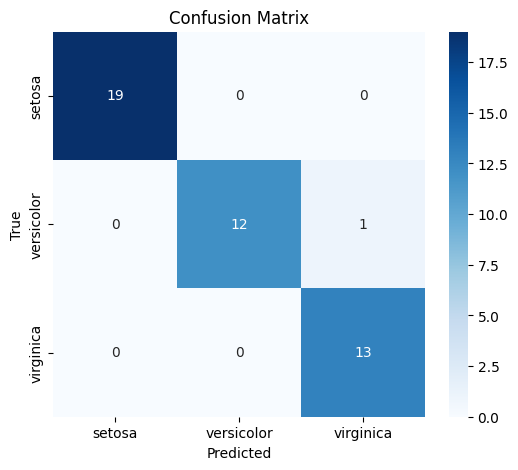

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the Iris dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

KNN Model Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00   

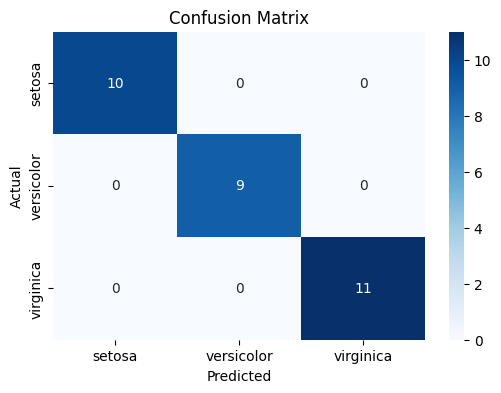

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris
# Load the Iris dataset
iris_data = load_iris()
data_frame = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
data_frame['species'] = iris_data.target
# Map target numbers to species names
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
data_frame['species'] = data_frame['species'].map(species_map)
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data_frame.head())
# Split into features (X) and target labels (y)
features = data_frame.iloc[:, :-1] # All columns except the last one
labels = data_frame.iloc[:, -1] # Last column (species)
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize KNN classifier with k=5
knn_classifier = KNeighborsClassifier(n_neighbors=5)
# Train the KNN model
knn_classifier.fit(X_train_scaled, y_train)
# Predict on the test set
predictions = knn_classifier.predict(X_test_scaled)
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'\nKNN Model Accuracy: {accuracy:.2f}')
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))
# Print confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)
# Visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
 xticklabels=iris_data.target_names, yticklabels=iris_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
